In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [742]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [743]:
comp1 = pd.read_csv('Company_Data.csv')

In [744]:
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [745]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# EDA

In [746]:
comp1[comp1.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8457d6ab60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8457d6b0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8457d6a9e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8457d6b5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457d6b880>],
 'means': []}

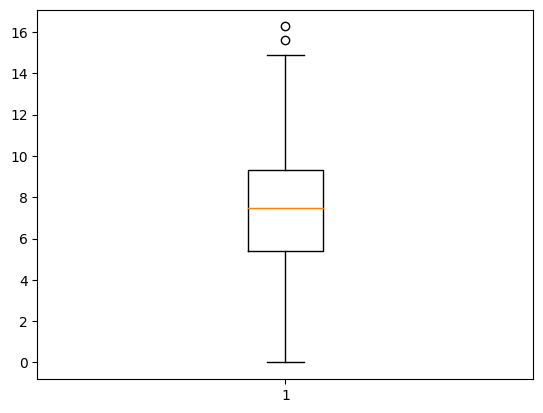

In [747]:
plt.boxplot(comp1['Sales'])

In [748]:
comp1['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [749]:
Sales_IQR = 9.320000 - 5.390000
Sales_Upper_limit = 9.320000 + (1.5* Sales_IQR)
Sales_Upper_limit

15.215000000000002

In [750]:
comp1[comp1['Sales']>Sales_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes


In [751]:
comp1['Sales'].mean()

7.496325000000001

In [752]:
comp1.loc[comp1['Sales']>Sales_Upper_limit, "Sales"] = comp1['Sales'].mean()

In [753]:
comp1[comp1['Sales']>Sales_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [754]:
comp1.iloc[[316,376]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
316,7.496325,122,36,5,369,72,Good,35,10,Yes,Yes
376,7.496325,141,60,19,319,92,Good,44,11,Yes,Yes


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8457c4b640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8457c4bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8457c4b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8457a7c100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457a7c3a0>],
 'means': []}

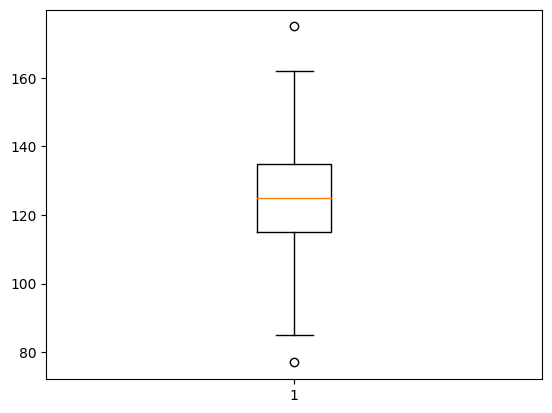

In [755]:
plt.boxplot(comp1['CompPrice'])

In [756]:
comp1['CompPrice'].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [757]:
CompPrice_IQR = 135.000000 - 115.000000
CompPrice_Upper_limit = 135.000000 + (1.5* CompPrice_IQR)
CompPrice_Upper_limit

165.0

In [758]:
comp1[comp1['CompPrice']>CompPrice_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
310,9.53,175,65,29,419,166,Medium,53,12,Yes,Yes


In [759]:
comp1['CompPrice'].mean()

124.975

In [760]:
comp1.loc[comp1['CompPrice']>CompPrice_Upper_limit, "CompPrice"] = comp1['CompPrice'].mean()

In [761]:
comp1.iloc[[310]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
310,9.53,124.975,65,29,419,166,Medium,53,12,Yes,Yes


In [762]:
comp1[comp1['CompPrice']>CompPrice_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [763]:
CompPrice_Lower_limit = 115.000000 - (1.5* CompPrice_IQR)
CompPrice_Lower_limit

85.0

In [764]:
comp1[comp1['CompPrice']<CompPrice_Lower_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,77.0,69,0,25,24,Medium,50,18,Yes,No


In [765]:
comp1.loc[comp1['CompPrice']<CompPrice_Lower_limit, "CompPrice"] = comp1['CompPrice'].mean()

In [766]:
comp1.iloc[[42]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,124.849937,69,0,25,24,Medium,50,18,Yes,No


In [767]:
comp1[comp1['CompPrice']<CompPrice_Lower_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8457ac6cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8457ac71f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8457ac6a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8457ac7730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457ac79d0>],
 'means': []}

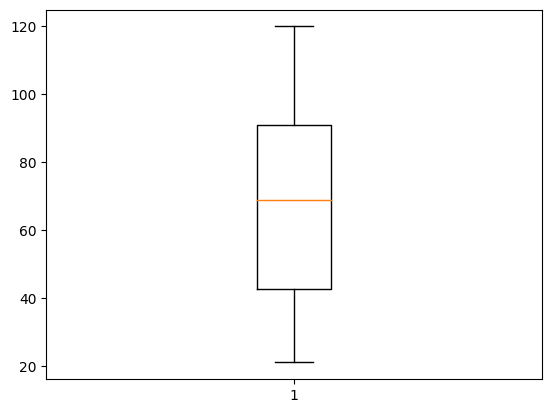

In [768]:
plt.boxplot(comp1['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8457b216f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8457b21ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8457b21450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8457b22050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457b222f0>],
 'means': []}

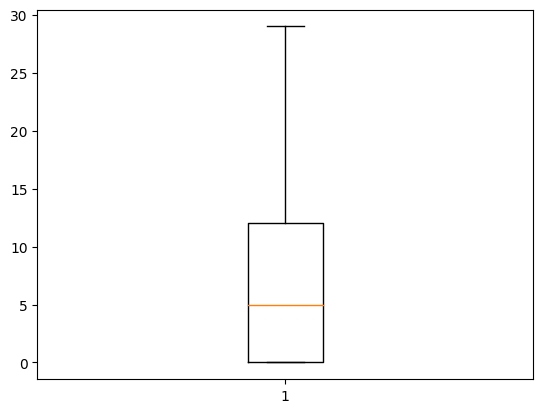

In [769]:
plt.boxplot(comp1['Advertising'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8457995060>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84579954b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8457994dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f84579959f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457995c90>],
 'means': []}

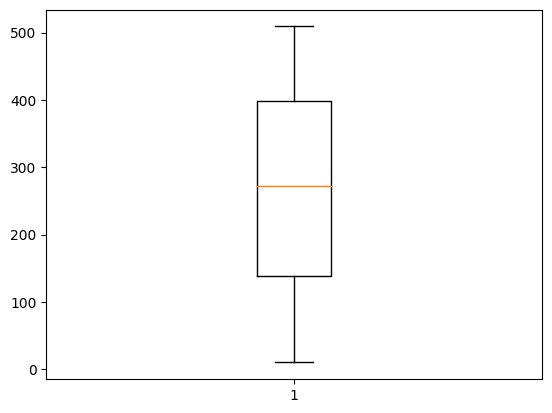

In [770]:
plt.boxplot(comp1['Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f84579d3910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84579d3e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f84579d3670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f84579fc3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f84579fc670>],
 'means': []}

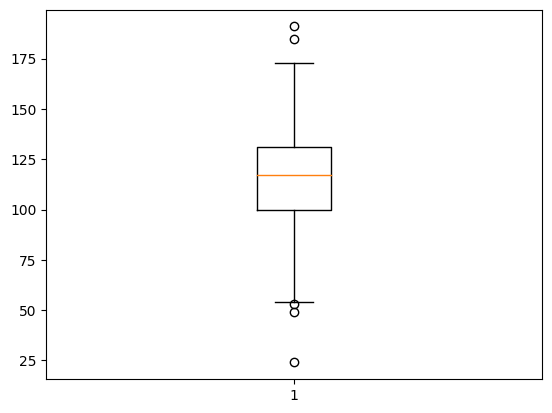

In [771]:
plt.boxplot(comp1['Price'])

In [772]:
comp1['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [773]:
Price_IQR = 131.000000 - 100.000000
Price_Upper_limit = 131.000000 + (1.5* Price_IQR)
Price_Upper_limit

177.5

In [774]:
comp1[comp1['Price']>Price_Upper_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
165,0.37,147.0,58,7,100,191,Bad,27,15,Yes,Yes
174,0.00,139.0,24,0,358,185,Medium,79,15,No,No


In [775]:
comp1['Price'].mean()

115.795

In [776]:
comp1.loc[comp1['Price']>Price_Upper_limit, "Price"] = comp1['Price'].mean()

In [777]:
comp1.iloc[[165,174]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
165,0.37,147.0,58,7,100,115.795,Bad,27,15,Yes,Yes
174,0.00,139.0,24,0,358,115.795,Medium,79,15,No,No


In [778]:
Price_Lower_limit = 100.000000 - (1.5* Price_IQR)
Price_Lower_limit

53.5

In [779]:
comp1[comp1['Price']<Price_Lower_limit]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,124.849937,69,0,25,24.0,Medium,50,18,Yes,No
125,9.34,89.000000,78,0,181,49.0,Medium,43,15,No,No
367,14.37,95.000000,106,0,256,53.0,Good,52,17,Yes,No


In [780]:
comp1.loc[comp1['Price']<Price_Lower_limit, "Price"] = comp1['Price'].mean()

In [781]:
comp1.iloc[[42,125,367]]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
42,10.43,124.849937,69,0,25,115.433975,Medium,50,18,Yes,No
125,9.34,89.000000,78,0,181,115.433975,Medium,43,15,No,No
367,14.37,95.000000,106,0,256,115.433975,Good,52,17,Yes,No


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8457a68550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8457a68a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8457a682b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8457a68fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457a69270>],
 'means': []}

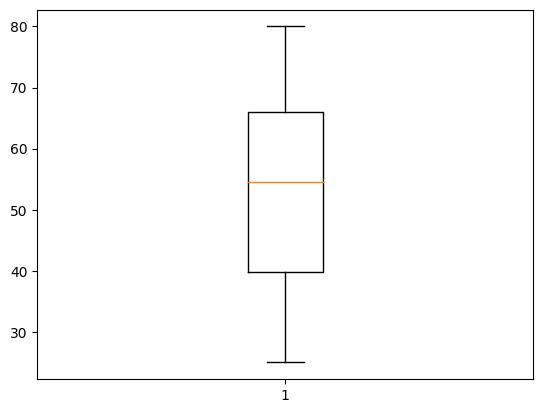

In [782]:
plt.boxplot(comp1['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f84578a2fe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8457c142e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f84578a2d40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8457c15630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8457c160b0>],
 'means': []}

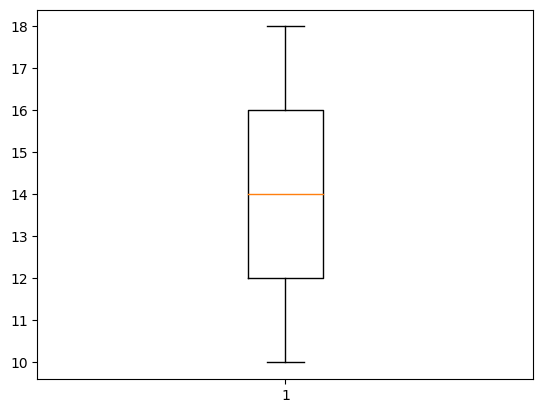

In [783]:
plt.boxplot(comp1['Education'])

In [784]:
comp1['ShelveLoc'] = comp1['ShelveLoc'].astype('category')

In [785]:
comp1['Urban'] = comp1['Urban'].astype('category')

In [786]:
comp1['US'] = comp1['US'].astype('category')

In [787]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    float64 
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    float64 
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(3), int64(5)
memory usage: 26.7 KB


In [788]:
comp1 = comp1.join(pd.get_dummies(comp1[['ShelveLoc','Urban','US']]))
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138.0,73,11,276,120.0,Bad,42,17,Yes,Yes,1,0,0,0,1,0,1
1,11.22,111.0,48,16,260,83.0,Good,65,10,Yes,Yes,0,1,0,0,1,0,1
2,10.06,113.0,35,10,269,80.0,Medium,59,12,Yes,Yes,0,0,1,0,1,0,1
3,7.40,117.0,100,4,466,97.0,Medium,55,14,Yes,Yes,0,0,1,0,1,0,1
4,4.15,141.0,64,3,340,128.0,Bad,38,13,Yes,No,1,0,0,0,1,1,0


In [789]:
comp1 = comp1.drop(['ShelveLoc','Urban','US'], axis =1)

In [790]:
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138.0,73,11,276,120.0,42,17,1,0,0,0,1,0,1
1,11.22,111.0,48,16,260,83.0,65,10,0,1,0,0,1,0,1
2,10.06,113.0,35,10,269,80.0,59,12,0,0,1,0,1,0,1
3,7.40,117.0,100,4,466,97.0,55,14,0,0,1,0,1,0,1
4,4.15,141.0,64,3,340,128.0,38,13,1,0,0,0,1,1,0


In [791]:
comp1['Sales'].describe()

count    400.000000
mean       7.454057
std        2.759548
min        0.000000
25%        5.390000
50%        7.490000
75%        9.312500
max       14.900000
Name: Sales, dtype: float64

In [792]:
comp1['Sales']= pd.cut(comp1["Sales"],bins=[0.000,5.39,9.312,14.9],labels=["Low","Good","Excellent"])

In [793]:
comp1['Sales'].head()

0    Excellent
1    Excellent
2    Excellent
3         Good
4          Low
Name: Sales, dtype: category
Categories (3, object): ['Low' < 'Good' < 'Excellent']

#LabelEncoder

In [794]:
from sklearn.preprocessing import LabelEncoder

In [795]:
encoder = LabelEncoder()

In [796]:
comp1['Sales'] = encoder.fit_transform(comp1['Sales'])
comp1['Sales']

0      0
1      0
2      0
3      1
4      2
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

# Train-Test Split

In [797]:
X = comp1.iloc[:,1:]
y = comp1.iloc[:,0]

In [798]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138.0,73,11,276,120.0,42,17,1,0,0,0,1,0,1
1,111.0,48,16,260,83.0,65,10,0,1,0,0,1,0,1
2,113.0,35,10,269,80.0,59,12,0,0,1,0,1,0,1
3,117.0,100,4,466,97.0,55,14,0,0,1,0,1,0,1
4,141.0,64,3,340,128.0,38,13,1,0,0,0,1,1,0


In [799]:
y.head()

0    0
1    0
2    0
3    1
4    2
Name: Sales, dtype: int64

In [800]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [801]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 14), (80, 14), (320,), (80,))

# Resampling using SMOTE

In [802]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [804]:
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,y_train)
#SM = SMOTETomek(random_state=42)
#X_train_res, y_train_res = SM.fit_resample(X_train, y_train)

# Hyperparameter Tuning (Randomized Search)



In [805]:
from sklearn.model_selection import GridSearchCV

In [806]:
pgrid = [{'n_estimators': (2,100,5), 'max_depth': range(2,10), 'min_samples_split': range(2,20), 'max_features': ['auto','sqrt','log2']}]

In [807]:
model0 = RandomForestClassifier()

In [808]:
import random
np.random.seed(42)

In [809]:
grid = GridSearchCV(model0, param_grid = pgrid, cv = 10)

In [811]:
grid.fit(X_train_res, y_train_res)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 10),
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': range(2, 20),
                          'n_estimators': (2, 100, 5)}])

In [812]:
best_model = grid.best_estimator_
best_model

RandomForestClassifier(max_depth=8, min_samples_split=8)

In [813]:
grid.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 100}

In [814]:
grid.best_score_

0.6741106719367588

In [815]:
best_model.score(X_train_res, y_train_res)

0.9419642857142857

In [816]:
best_model.score(X_test, y_test)

0.6

# Random Forest Classifier

In [825]:
RF_model = RandomForestClassifier(n_estimators = 100, max_depth = 8, min_samples_split=8, max_features='sqrt')

In [840]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=8)

# Metrics

In [841]:
RF_pred_train = RF_model.predict(X_train)

In [842]:
confusion_matrix(y_train, RF_pred_train)

array([[ 69,   9,   0,   0],
       [  3, 156,   0,   0],
       [  0,   8,  74,   0],
       [  0,   1,   0,   0]])

In [844]:
print(classification_report(y_train, RF_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        78
           1       0.90      0.98      0.94       159
           2       1.00      0.90      0.95        82
           3       0.00      0.00      0.00         1

    accuracy                           0.93       320
   macro avg       0.71      0.69      0.70       320
weighted avg       0.94      0.93      0.93       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [845]:
RF_pred_test = RF_model.predict(X_test)

In [846]:
confusion_matrix(y_test, RF_pred_test)

array([[11, 10,  1],
       [ 5, 32,  4],
       [ 0,  8,  9]])

In [847]:
print(classification_report(y_test, RF_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.64      0.78      0.70        41
           2       0.64      0.53      0.58        17

    accuracy                           0.65        80
   macro avg       0.66      0.60      0.62        80
weighted avg       0.65      0.65      0.64        80

